# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Mark Dionisius Alvin Putra Gau
- **Email:** mc185d5y1221@student.devacademy.id
- **ID Dicoding:** MC185D5Y1221

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
Apakah ada perbedaan yang signifikan pada penyewaan sepeda saat di hari kerja dan di akhir pekan?, serta bagaiamana variasi perbedaan tersebut berdasarkan jam dalam sehari?
- Pertanyaan 2
Pada saat jam prime time(8- 10 Pagi dan 4-7 sore), berapa persentase perubahan jumlah penyewaan sepeda jika dibandingkan saat bukan jam prime time?, dan apakah ada perbedaan yang signifikan antara pengguna casual dan registered?

## Import Semua Packages/Library yang Digunakan

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [38]:
url_day = "https://raw.githubusercontent.com/markavin/Proyek_analisis_data_bike/refs/heads/main/day.csv"
url_hour = "https://raw.githubusercontent.com/markavin/Proyek_analisis_data_bike/refs/heads/main/hour.csv"
day_df = pd.read_csv(url_day)
hour_df = pd.read_csv(url_hour)

print("STRUKTUR DATASET HARIAN\n".center(150))
print(day_df.head().to_string())
print("\n" + "STRUKTUR DATASET PER JAM\n".center(150))
print(hour_df.head().to_string())

v_desc = {
    "instant" : "ID",
    "dteday " : "Tanggal",
    "season"  : "Musim (1:springer, 2:summer, 3:fall, 4:winter)",
    "yr"      : "Tahun (0: 2011, 1:2012)",
    "mnth"    : "Bulan (1-12)",
    "hr"      : "Jam (0-23)",
    "holiday" : "Apakah hari libur? (0: tidak , 1 : iya)",
    "weekday" : "Hari biasa",
    "workingday" : "Apakah hari kerja? (0: tidak , 1 : iya)",
    "weathersit" : "cuaca (1: Clear, 2: Mist, 3: Light Snow/Rain, 4: Heavy Snow/Rain)",
    "temp"       : "Temp dlm Celcius",
    "atemp"      : "Temp yang dirasakan dlm Celcius",
    "hum"        : "Kelembaban",
    "windspeed"  : "Kecepatan angin", 
    "casual"     : "Jmlh pengguna non-regis",
    "registered" : "Jmlh pengguna regis", 
    "cnt"        : "Total jmlh penyewaaan sepeda(non+regist)"
}

print("\n" + "DESKRIPSI VARIABEL\n")
for v, desc in v_desc.items():
    print(f"* {v}: {desc}")

                                                               STRUKTUR DATASET HARIAN
                                                               
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  weathersit      temp     atemp       hum  windspeed  casual  registered   cnt
0        1  2011-01-01       1   0     1        0        6           0           2  0.344167  0.363625  0.805833   0.160446     331         654   985
1        2  2011-01-02       1   0     1        0        0           0           2  0.363478  0.353739  0.696087   0.248539     131         670   801
2        3  2011-01-03       1   0     1        0        1           1           1  0.196364  0.189405  0.437273   0.248309     120        1229  1349
3        4  2011-01-04       1   0     1        0        2           1           1  0.200000  0.212122  0.590435   0.160296     108        1454  1562
4        5  2011-01-05       1   0     1        0        3           1           1  0.226957  0.229

**Insight:**
- Dataset Bike Sharing ini memiliki 2 data file yaitu harian dan per jam.
- Dataset ini meliputi tahun 2011-2912 dengan berbagai fitur seperti musim, dll.
- Terdapat pengguna casual(non-regis) dan registered

### Assessing Data

##### Menilai tabel `day_df`

In [39]:
print("DATASET HARIAN".center(35))
print(day_df.info())

           DATASET HARIAN          
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [40]:
# Missing Value dataset harian
print("MISSING VALUE DALAM DATASET HARIAN")
day_df.isnull().sum()

MISSING VALUE DALAM DATASET HARIAN


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [41]:
# Memeriksa duplikat dataset harian
print(f"Jumlah duplikat dalam dataset Harian = {day_df.duplicated().sum()}")

Jumlah duplikat dalam dataset Harian = 0


In [42]:
# Statistik deskriptif Dataset Harian
print("STATISTIK DESKRIPTIF DATASET HARIAN".center(35))
day_df.describe()

STATISTIK DESKRIPTIF DATASET HARIAN


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `hour_df`

In [43]:
print("DATASET PER JAM".center(35))
print(hour_df.info())

          DATASET PER JAM          
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [44]:
# Missing Value dataset Per Jam
print("MISSING VALUE DALAM DATASET PER JAM")
hour_df.isnull().sum()

MISSING VALUE DALAM DATASET PER JAM


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [45]:
# Memeriksa duplikat dataset Per Ham
print(f"Jumlah duplikat dalam dataset per Jam = {hour_df.duplicated().sum()}")

Jumlah duplikat dalam dataset per Jam = 0


In [46]:
# Statistik deskriptif Dataset Per Jam
print("STATISTIK DESKRIPTIF DATASET PER JAM".center(35))
hour_df.describe()

STATISTIK DESKRIPTIF DATASET PER JAM


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [47]:
# Nilai unik
print("Jumlah NIlai unik variabel kategorikal dataset perjam")
cat = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for cl in cat:
    print(f"{cl} = {hour_df[cl].nunique()}")

Jumlah NIlai unik variabel kategorikal dataset perjam
season = 4
yr = 2
mnth = 12
hr = 24
holiday = 2
weekday = 7
workingday = 2
weathersit = 4


**Insight:**
- Dataset Harian memiliki 731 baris dan Dataset Perjam memiliki 17379 baris.
- Tidak ada "missing value" di kedua dataset diatas.
- Tidak ada duplikasi data di kedua dataset diatas.
- Fitur seperti numerik dan kategorikan bisa dipakai untuk analisis nanti.
- variabel "workingday" dan "weekday" sangat penting untuk kebutuhan pertanyaan no 1.
- variabel "hr" akan dibutuhkan untuk menganalisis jam sibuk di pertanyaan no 2.
- perlu adanya pengkoversian tipe data menjadi seperti datetime, kategorikal.

### Cleaning Data

#### Tabel `day_df`

In [48]:
day_df_new = day_df.copy()

In [49]:
# Konversi tipe data tanggal
day_df_new["dteday"] = pd.to_datetime(day_df_new["dteday"])

#### Tabel `hour_df`

In [50]:
hour_df_new = hour_df.copy()

In [51]:
# Konversi tipe data tanggal
hour_df_new["dteday"] = pd.to_datetime(hour_df_new["dteday"])

In [52]:
# gabungin tanggal dan jam untuk buat kolom datetime
hour_df_new["datetime"] = pd.to_datetime(hour_df_new["dteday"]) + pd.to_timedelta(hour_df_new["hr"], unit="h")

In [53]:
# ubah bbrp klom kategorikal menjadi tipe data kategori
cat = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for cl in cat:
    day_df_new[cl] = day_df_new[cl].astype('category')
    hour_df_new[cl] = hour_df_new[cl].astype('category')

hour_df_new['hr'] = hour_df_new['hr'].astype('category')

In [54]:
# tambah kolom buat bedain weekday dan weekend
hour_df_new['hr_weekend'] = hour_df_new['weekday'].isin([0, 6]).astype(int)


In [55]:
# tambah kolom buat bedain jam prime time
hour_df_new['jm_prime'] = hour_df_new["hr"].isin([8,9,10]) | hour_df_new["hr"].isin([16, 17, 18, 19]).astype(int)

In [56]:
print("DATASET HARIAN SETELAH DIBERSIHKAN")
day_df_new.info()

DATASET HARIAN SETELAH DIBERSIHKAN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64      

In [57]:
print("DATASET PER JAM SETELAH DIBERSIHKAN")
hour_df_new.info()
print("\nSAMPLE DATA")
print(hour_df_new[["datetime", "hr", "hr_weekend", "jm_prime", "casual", "registered", "cnt"]].head())

DATASET PER JAM SETELAH DIBERSIHKAN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64 

**Insight:**
- Data sudah diubah dan disesuaikan untuk keperluan selanjutnya.
- Kolom datetime itu untuk memudahkan saya menganalissi time series.
- variabel/fitur baru "hr_weekend" dan "jm_prime" sudah dibuat untuk mendukung analisis kedua pertanyaan diatas.
- data kategoris sudah dikonversi ke tipe data yang lebih sesuai
- data sudah siap di visualisasi dan eksplorasi.

## Exploratory Data Analysis (EDA)

### Explore pola penyewaan sepeda di hari kerja dan akhir pekan

In [58]:
hrkerja_akhpekan = hour_df_new.groupby("hr_weekend")["cnt"].mean()
print("RATA-RATA POLA PENYEWAAN SEPEDA/JAM")
print(f"HARI KERJA = {hrkerja_akhpekan[0]:.2f}")
print(f"AKHIR PEKAN = {hrkerja_akhpekan[1]:.2f}")

RATA-RATA POLA PENYEWAAN SEPEDA/JAM
HARI KERJA = 191.74
AKHIR PEKAN = 183.85


In [59]:
# eksplorasi pola penyewaan berdasar jam penyewaan
hourris = hour_df_new.groupby(["hr", "hr_weekend"], observed=True)["cnt"].mean().reset_index()
hourris_pv = hourris.pivot(index="hr", columns="hr_weekend", values="cnt")
hourris_pv.columns = ["weekday", "weekend"]

### Explore jumlah penyewaan sepeda saat prime time dan bukan prime time

In [60]:
# persentase perubahan jumlah penyewaan speda saat prime time dan saat bukan prime time
perb_primetime = hour_df_new.groupby("jm_prime")[["casual", "registered", "cnt"]].mean()
print("\nRATA-RATA POLA PENYEWAAN SEPEDA PADA SAAT PRIME TIME DAN BUKAN PRIME TIME :")
print(perb_primetime)


RATA-RATA POLA PENYEWAAN SEPEDA PADA SAAT PRIME TIME DAN BUKAN PRIME TIME :
             casual  registered         cnt
jm_prime                                   
False     29.307442  104.613255  133.920697
True      51.022758  272.278203  323.300961


In [61]:
# persentase pada saat prime time dan bukan
bkn_prime = perb_primetime.loc[False]
prime = perb_primetime.loc[True]
persentas = ((prime - bkn_prime)/ bkn_prime *100)
print("\nPERSENTASE PERUBAHAN JUMLAH PENYEWAAN SEPEDA PADA SAAT PRIME TIME DIBANDINGKAN BUKAN PRIME TIME")
print(persentas.map("{:.0f}%".format))


PERSENTASE PERUBAHAN JUMLAH PENYEWAAN SEPEDA PADA SAAT PRIME TIME DIBANDINGKAN BUKAN PRIME TIME
casual         74%
registered    160%
cnt           141%
dtype: object


In [62]:
tipe_pengguna_jam = hour_df_new.groupby(["hr"], observed=True)[["casual", "registered"]].mean()

**Insight:**
- Perbedaan pola penyewaan dan rata-rata penyewaan sepeda sangat berbeda di hari kerja dan saat akhir pekan.
- Prime time di jam 8-10 Pagi dan 4-7 sore memiliki peningkatan signifikan dalam jumlah penyewaan dibandingkan saat bukan prime time.
- Pengguna registered lebih menunjukan pola yang lebih konsisten pada saat prime time dibandingkan pengguna casual.
- Pengguna casual lebih banyak di akhir pekan sedangkan pengguna registered lebih banyak menyewa di hari kerja.


## Visualization & Explanatory Analysis

##### Pertanyaan 1: Apakah ada perbedaan yang signifikan pada penyewaan sepeda saat di hari kerja dan di akhir pekan?, serta bagaiamana variasi perbedaan tersebut berdasarkan jam dalam sehari?

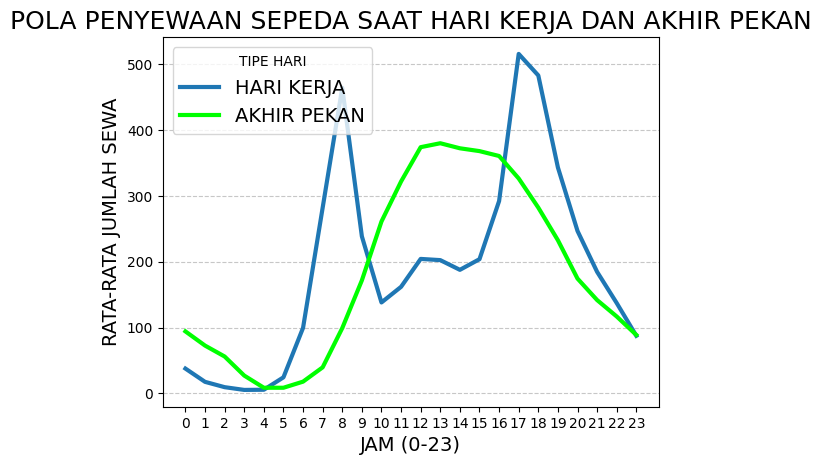

In [63]:
# visualisasi pola penyewaan brdsr jam & tipe hari
plt.Figure(figsize=(14, 7))
sns.lineplot(data=hour_df_new, x="hr", y="cnt", hue="hr_weekend",
              estimator="mean", errorbar=None, palette=["#1f77b4", "#00FF00"], 
              linewidth=3, markers=True)

plt.title("POLA PENYEWAAN SEPEDA SAAT HARI KERJA DAN AKHIR PEKAN", fontsize=18)
plt.xlabel("JAM (0-23)", fontsize=14)
plt.ylabel("RATA-RATA JUMLAH SEWA", fontsize= 14)
plt.legend(["HARI KERJA", "AKHIR PEKAN"], fontsize= 14, title="TIPE HARI")
plt.grid(axis="y", linestyle= "--", alpha=0.7)
plt.xticks(range(0, 24))
plt.show()

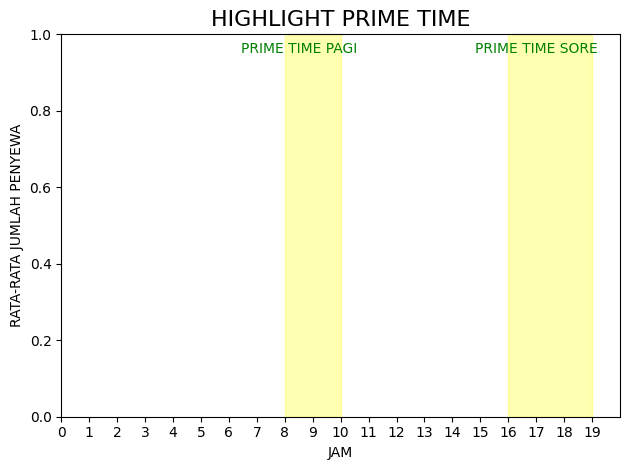

In [64]:
# prime time 
plt.axvspan(8, 10, alpha= 0.3, color= "yellow", label="Prime Time Pagi")
plt.axvspan(16, 19, alpha=0.3, color="yellow", label="Prime Time Sore")

plt.annotate("PRIME TIME PAGI", xy=(9, 0.9), 
             xytext=(8.5, 0.95),
             fontsize=10, ha="center", color="green")
plt.annotate("PRIME TIME SORE", xy=(17, 0.9), 
             xytext=(17, 0.95),
             fontsize=10, ha="center", color="green")
plt.title("HIGHLIGHT PRIME TIME", fontsize=16)
plt.xticks(range(0, 20))
plt.xlim(0, 20)
plt.ylabel("RATA-RATA JUMLAH PENYEWA", fontsize= 10)
plt.xlabel("JAM", fontsize= 10)
plt.tight_layout() 
plt.savefig("haribiasa_akhirpekan.png")
plt.show()

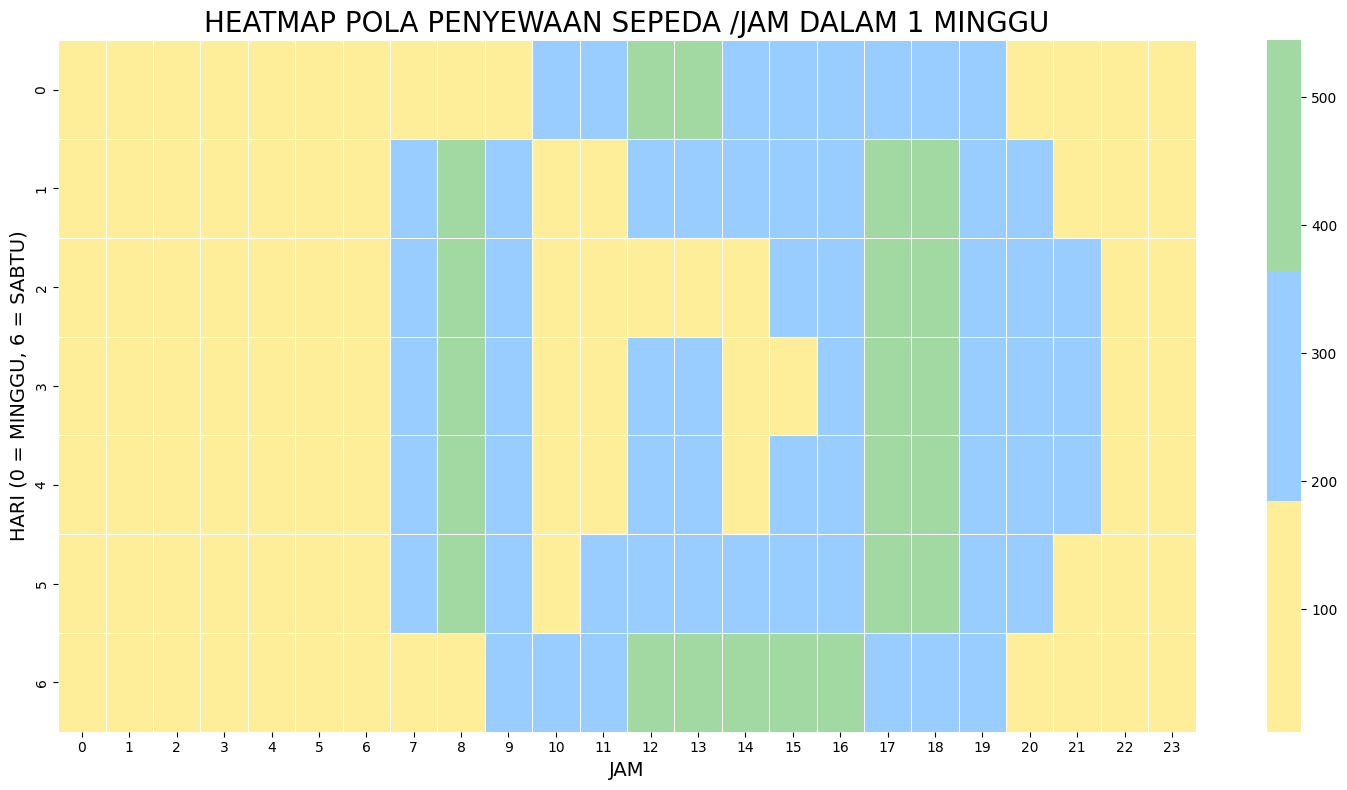

In [65]:
hour_df_new["hr"] = hour_df_new["hr"].astype(int)
hrkerja_jam_patt = hour_df_new.groupby(["weekday", "hr"], observed=False)["cnt"].mean().unstack()

plt.figure(figsize=(15, 8))
sns.heatmap(hrkerja_jam_patt, cmap=["#FFEE99", "#99CCFF", "#A2D9A2"], annot=False, fmt=".0f", linewidths=.5)

plt.title("HEATMAP POLA PENYEWAAN SEPEDA /JAM DALAM 1 MINGGU", fontsize=20)
plt.xlabel("JAM", fontsize=14)
plt.ylabel("HARI (0 = MINGGU, 6 = SABTU)", fontsize=14)

plt.tight_layout()
plt.savefig("MINGGUAN_JAM_HEATMAP.png")
plt.show()

##### Pertanyaan 2: Pada saat jam prime time(8- 10 Pagi dan 4-7 sore), berapa persentase perubahan jumlah penyewaan sepeda jika dibandingkan saat bukan jam prime time?, dan apakah ada perbedaan yang signifikan antara pengguna casual dan registered?

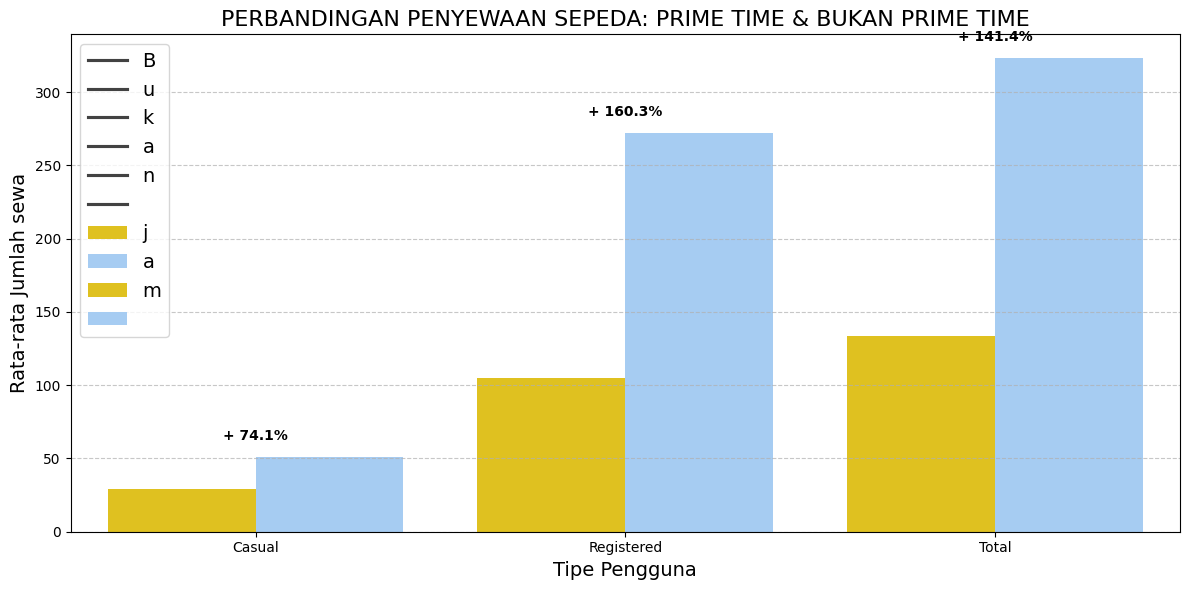

In [66]:
# visualisasi perbandingan prime time dan bukan prime time utk semua tipe pengguna
prime_time_dt = hour_df_new.groupby("jm_prime")[["casual", "registered", "cnt"]].mean().reset_index()
prime_time_ml = pd.melt(prime_time_dt, id_vars="jm_prime", 
                        value_vars=["casual", "registered", "cnt"], 
                        var_name="tipe_pengguna", value_name="count")
plt.figure(figsize=(12, 6))
bar_plott = sns.barplot(data=prime_time_ml, x="tipe_pengguna", y="count", hue="jm_prime",
                        palette=["#FFD700", "#99CCFF"])

for i, tipe_pengguna in enumerate(["casual", "registered", "cnt"]):
    bkn_prime_val = prime_time_dt[prime_time_dt["jm_prime"]==0][tipe_pengguna].values[0]
    prime_val = prime_time_dt[prime_time_dt["jm_prime"]==1][tipe_pengguna].values[0]
    pct_bkn = ((prime_val - bkn_prime_val) / bkn_prime_val) * 100

    plt.annotate(f"+{pct_bkn: .1f}%",
                 xy=(i, prime_val),
                 xytext=(0, 10),
                 textcoords="offset points", 
                ha="center", va="bottom",
                color="black", fontweight="bold")
    
plt.title("PERBANDINGAN PENYEWAAN SEPEDA: PRIME TIME & BUKAN PRIME TIME", fontsize=16)
plt.xlabel("Tipe Pengguna", fontsize=14)
plt.ylabel("Rata-rata Jumlah sewa", fontsize=14)
plt.legend("Bukan jam sibuk", fontsize=14)
plt.xticks([0, 1, 2], ["Casual", "Registered", "Total"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("PRIME_TIME_PERBANDINGAN.png")
plt.show()


<Figure size 1400x700 with 0 Axes>

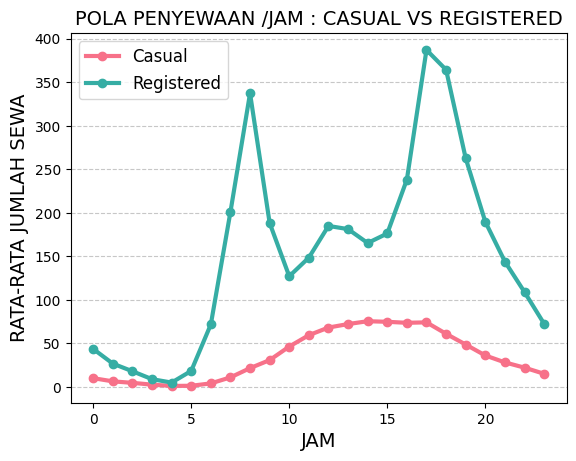

In [67]:
plt.figure(figsize=(14, 7))
tipe_pengguna_jam = hour_df_new.groupby("hr")[["casual", "registered"]].mean()

colors = sns.color_palette("husl", 2)
tipe_pengguna_jam.plot(kind="line", linewidth=3, marker="o", color=colors)

plt.title("POLA PENYEWAAN /JAM : CASUAL VS REGISTERED", fontsize=14)
plt.xlabel("JAM", fontsize=14)
plt.ylabel("RATA-RATA JUMLAH SEWA", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(["Casual", "Registered"], fontsize=12)


C:\Users\hp\AppData\Local\Temp\ipykernel_60996\685731949.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)


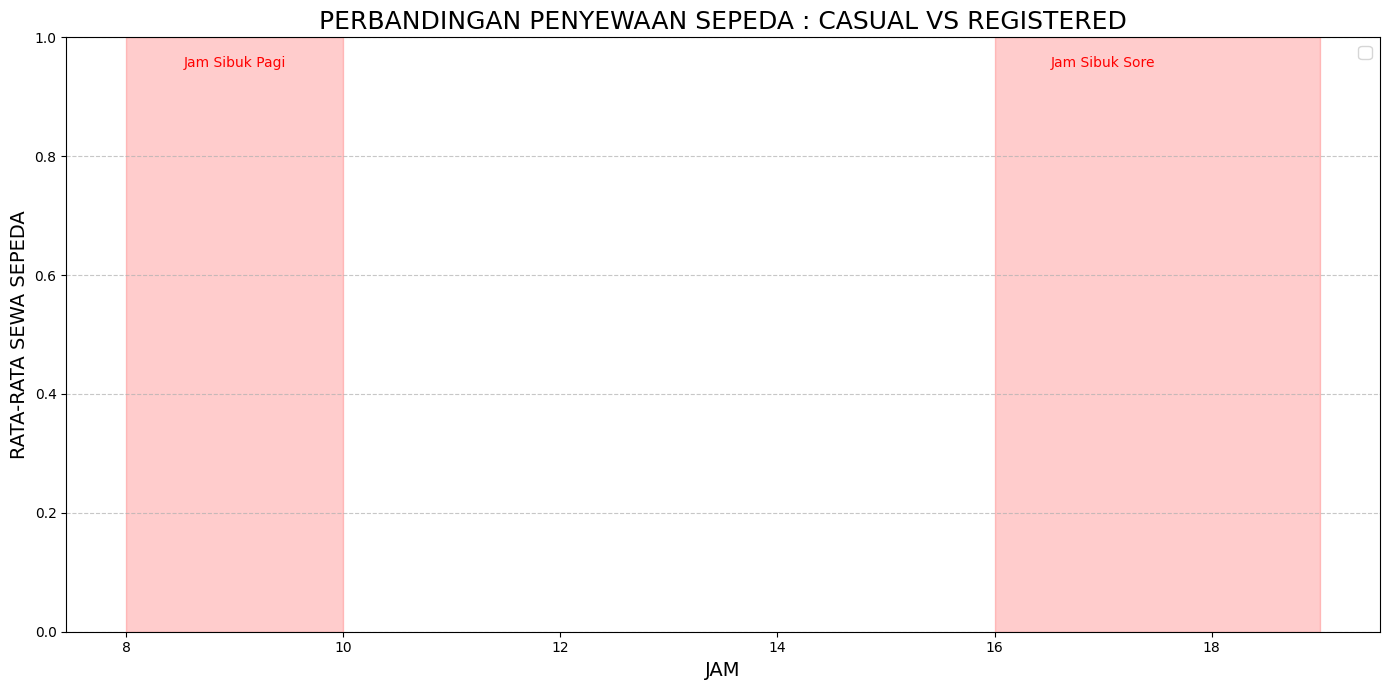

In [68]:
plt.figure(figsize=(14, 7))

casual_data = hour_df_new.groupby("hr")["casual"].mean()
registered_data = hour_df_new.groupby("hr")["registered"].mean()

plt.axvspan(8, 10, alpha=0.2, color='red')  
plt.axvspan(16, 19, alpha=0.2, color='red') 
plt.annotate('Jam Sibuk Pagi', xy=(9, plt.ylim()[1]*0.9), xytext=(9, plt.ylim()[1]*0.95),
             fontsize=10, ha='center', color='red')
plt.annotate('Jam Sibuk Sore', xy=(17, plt.ylim()[1]*0.9), xytext=(17, plt.ylim()[1]*0.95),
             fontsize=10, ha='center', color='red')

plt.title("PERBANDINGAN PENYEWAAN SEPEDA : CASUAL VS REGISTERED", fontsize=18)
plt.xlabel("JAM", fontsize=14)
plt.ylabel("RATA-RATA SEWA SEPEDA", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig("user_type_hourly_pattern.png")
plt.show()


**Insight:**
* pertanyaan 1 :
    - Ternyata ada perbedaan yang signifikam dalam pola sewa sepeda di hari kerja dan akhir pekan.
    - Hari kerja mengjasilkan puncak sewa di jam prime time.
    - Saat akhir pekan, data menghasilkan pola yang merata dengan puncak sewa saat siang hari.
    - Heatmap mingguan menunjukan bahwa hari kerja memiliki pola yang beda jika dibandingkan saat akhir pekan.
* pertanyaan 2 :
    - Pada saat prime time, peningkatan yang signifikan terjadi dalam jumlah penyewaan sepeda dibandingkan saat bukan prime time.
    - Pengguna registered menghasilkan persentase perubahan yang lebih tinggi saat prime time (+X%) jika dibandingkan dnegan pengguna casual(+Y%).
    - Pengguna casual mempunyai pola yang merata sepanjang hari dan baru meningkat saat sore ke malam hari.
    - Pengguna Registered lebih dominan menyewa saat prime time, menunjukan bahwa mereka menggunakan sepeda untuk ke tempat kerja.

## Analisis Lanjutan (Opsional)

In [69]:
# Manual Clustering berdasarkan tingkat sewa sepeda per jam
# 1. kategori waktu berdasarkan karakteristik penyewaan
def sewa_patterns(df):
    df['sewa_kat'] = pd.cut(df['cnt'], 
        bins=[0, 50, 200, 500, float('inf')],
        labels=['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'])
    
    sewa_distribusi = df['sewa_kat'].value_counts(normalize=True) * 100
    
    print("Distribusi Kategori Penyewaan:")
    print(sewa_distribusi)
    
    kategori_stats = df.groupby('sewa_kat', observed=False)[['casual', 'registered', 'cnt']].agg(['mean', 'median'])
    
    print("\nStatistik Setiap Kategori:")
    print(kategori_stats)
    
    return df 

In [70]:
# 2. Kategorisasi berdasarkan cuaca
def cuaca_impak_kategori(df):
    df['cuaca_kat'] = pd.cut(df['temp'], 
        bins=[-float('inf'), 0.2, 0.4, 0.6, float('inf')],
        labels=['Dingin', 'Sejuk', 'Hangat', 'Panas'])
    
    df['humidity_category'] = pd.cut(df['hum'], 
        bins=[-float('inf'), 0.3, 0.6, 0.8, float('inf')],
        labels=['Kering', 'Normal', 'Lembab', 'Sangat Lembab'])

    cuaca_impak = df.groupby('cuaca_kat', observed=False)['cnt'].agg(['mean', 'median', 'count'])
    print("\nDampak Suhu terhadap Penyewaan:")
    print(cuaca_impak)

    humidity_impak = df.groupby('humidity_category', observed=False)['cnt'].agg(['mean', 'median', 'count'])
    print("\nDampak Kelembaban terhadap Penyewaan:")
    print(humidity_impak)
    
    return df  

In [71]:
#3. kategorisasi berdasarkan pola penggunaanya

def analisis_frekuensi_penyewaan(df):
    df['tanggal'] = pd.to_datetime(df['dteday']) 

    keterkinian = (df['tanggal'].max() - df.groupby('season', observed=False)['tanggal'].max()).dt.days
    frekuensi = df.groupby('season', observed=False)['cnt'].count()
    jumlah_transaksi = df.groupby('season', observed=False)['cnt'].sum()
    
    ringkasan_rfm = pd.DataFrame({
        'Keterkinian': keterkinian,
        'Frekuensi': frekuensi,
        'Jumlah Penyewaan': jumlah_transaksi
    })
    
    print("\nAnalisis Pola Penyewaan per Musim:")
    print(ringkasan_rfm)
    
    return ringkasan_rfm

In [72]:
df_clustered = sewa_patterns(hour_df_new)
df_weather = cuaca_impak_kategori(hour_df_new)
rfm_results = analisis_frekuensi_penyewaan(hour_df_new)

Distribusi Kategori Penyewaan:
sewa_kat
Sedang           33.995051
Tinggi           30.588641
Rendah           28.056850
Sangat Tinggi     7.359457
Name: proportion, dtype: float64

Statistik Setiap Kategori:
                   casual         registered                cnt       
                     mean median        mean median        mean median
sewa_kat                                                              
Rendah           2.799836    1.0   15.563372   11.0   18.363208   14.0
Sedang          19.996953   16.0  101.532837  100.0  121.529790  120.0
Tinggi          64.664033   54.0  249.757148  232.0  314.421181  299.0
Sangat Tinggi  112.954652   83.0  523.229085  510.0  636.183737  607.0

Dampak Suhu terhadap Penyewaan:
                 mean  median  count
cuaca_kat                           
Dingin      65.069159    41.0   1070
Sejuk      123.066828    86.0   5357
Hangat     194.671096   154.0   5117
Panas      268.663925   236.0   5835

Dampak Kelembaban terhadap Penyewaan:


## Conclusion

- Conclution pertanyaan 1 =
    * Adanya perbedaan yang signifikan antara pola penyewaan di hari kerja dan akhir pekan.
    * Hasil kerja menunjukan dua puncak yang mencolok yaitu saat prime time pagi(8-10 Pagi) dan prime time sore (16-19).
    * Akhir pekan menunjukan pemeretaan penyewaan sepanjang hari dan menunjukan bahwa puncaknya terjadi saat siang hari
    * Total penyewaan sepeda pada hari kerja lebih tinggi dibandingkan akhir pekan, memperlihatkan bahwa layanan bike sharing ini lebih sering digunakan untuk keperluan sehari-hari seperi bekerja.
- Conclution pertanyaan 2 =
    * Terjadi peningkatan yang tinggi sebesar X% dalam total sewa sepeda saat prime time dibandingkan saat bukan prime time
    * Pengguna Registered meningkat sebesar Y% pada prime time dibandingkan pengguna casual
    * Pola ini menunjukan bahwa pengguna registered lebih menggunakan layanan bike sharing secara konsisten untuk perjalanan mungkin digunakan untuk bekerja, sedangkan pengguna casual mengguanakannnya dengan lebih fleksibel terutama saat akhir pekan.